In [1]:
import joblib
import pandas as pd
from yellowbrick.classifier import classification_report

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%pwd

'/home/dyllanjr/Documents/Classification-M2/notebooks/model_building'

In [3]:
%cd /home/dyllanjr/Documents/Classification-M2/models

/home/dyllanjr/Documents/Classification-M2/models


In [4]:
forest = joblib.load('random_forest_baseline.joblib')

In [5]:
%cd /home/dyllanjr/Documents/Classification-M2/data/processed

/home/dyllanjr/Documents/Classification-M2/data/processed


In [6]:
csh130 = pd.read_pickle('csh130.pkl')
csh125 = pd.read_pickle('csh125.pkl')
csh120 = pd.read_pickle('csh120.pkl')

In [7]:
len(csh125.activity.unique())

35

In [8]:
len(csh130.activity.unique())

28

In [9]:
len(csh120.activity.unique())

35

In [10]:
csh120.activity.unique() in csh125.activity.unique()


True

In [11]:
sorted(csh120.activity.unique())

['Bathe',
 'Bed_Toilet_Transition',
 'Cook',
 'Cook_Breakfast',
 'Cook_Dinner',
 'Cook_Lunch',
 'Dress',
 'Drink',
 'Eat',
 'Eat_Breakfast',
 'Eat_Dinner',
 'Eat_Lunch',
 'Enter_Home',
 'Entertain_Guests',
 'Evening_Meds',
 'Groom',
 'Leave_Home',
 'Morning_Meds',
 'Other_Activity',
 'Personal_Hygiene',
 'Phone',
 'Read',
 'Relax',
 'Sleep',
 'Sleep_Out_Of_Bed',
 'Step_Out',
 'Take_Medicine',
 'Toilet',
 'Wash_Breakfast_Dishes',
 'Wash_Dinner_Dishes',
 'Wash_Dishes',
 'Wash_Lunch_Dishes',
 'Watch_TV',
 'Work_At_Table',
 'Work_On_Computer']

In [12]:
sorted(csh125.activity.unique())

['Bathe',
 'Bed_Toilet_Transition',
 'Cook',
 'Cook_Breakfast',
 'Cook_Dinner',
 'Cook_Lunch',
 'Dress',
 'Drink',
 'Eat',
 'Eat_Breakfast',
 'Eat_Dinner',
 'Eat_Lunch',
 'Enter_Home',
 'Entertain_Guests',
 'Evening_Meds',
 'Groom',
 'Leave_Home',
 'Morning_Meds',
 'Other_Activity',
 'Personal_Hygiene',
 'Phone',
 'Read',
 'Relax',
 'Sleep',
 'Sleep_Out_Of_Bed',
 'Step_Out',
 'Take_Medicine',
 'Toilet',
 'Wash_Breakfast_Dishes',
 'Wash_Dinner_Dishes',
 'Wash_Dishes',
 'Wash_Lunch_Dishes',
 'Watch_TV',
 'Work',
 'Work_On_Computer']

In [13]:
X = csh120.drop('activity', axis=1)
y = csh120.activity

In [14]:
forest.score(X, y)

0.9887997838969459

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


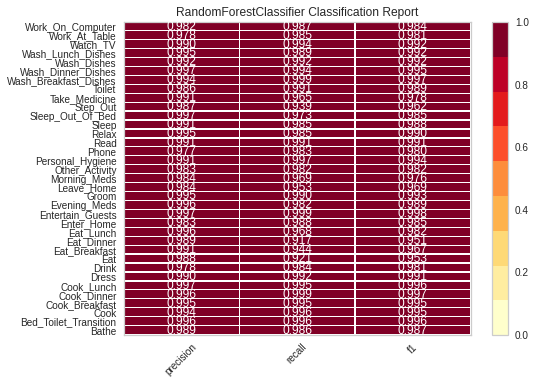

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faf97ff2bb0>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7faf97ff2310>,
                     model=None)

In [15]:
classification_report(forest, X, y)

In [ ]:
csh120.head()

In [ ]:
csh125.activity.value_counts()

In [ ]:
csh130.activity.value_counts()

In [ ]:
csh120.activity.value_counts()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
ys = forest.feature_importances_
xs = X.columns

In [31]:
d = {}
for x, y in zip(xs, ys):
    d[x] = y

In [44]:
sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

In [45]:
sorted_d

{'numDistinctSensors': 0.0,
 'sensorCount-Chair': 0.0,
 'sensorCount-Hall': 0.0,
 'sensorCount-Office': 0.0,
 'sensorElTime-Chair': 0.0,
 'sensorElTime-Hall': 0.0,
 'sensorElTime-Office': 0.0,
 'timeSinceLastSensorEvent': 0.007461070826037656,
 'sensorCount-DiningRoom': 0.007990815481421866,
 'sensorCount-OutsideDoor': 0.010736216354411632,
 'sensorCount-Kitchen': 0.012533854441877072,
 'sensorCount-LivingRoom': 0.01595826358979697,
 'sensorCount-Bathroom': 0.01635069385596256,
 'prevDominantSensor1': 0.01698020409480534,
 'sensorElTime-Ignore': 0.01709807374546604,
 'prevDominantSensor2': 0.017247378139730044,
 'areaTransitions': 0.018125778253789047,
 'lastSensorID': 0.020067591673378408,
 'lastSensorLocation': 0.020218258745494128,
 'sensorCount-WorkArea': 0.02166236607860586,
 'complexity': 0.023516692824758198,
 'activityChange': 0.024592390456254963,
 'sensorCount-Bedroom': 0.026859172324596933,
 'lastSensorDayOfWeek': 0.029472082206052245,
 'sensorCount-Ignore': 0.03237332762591

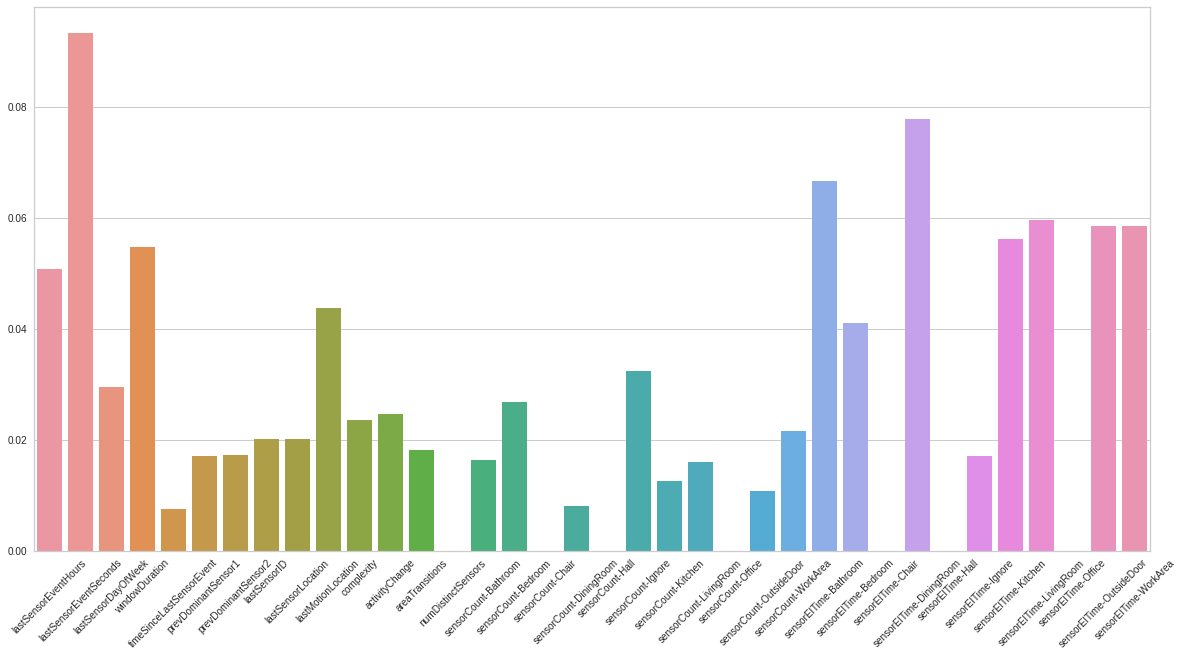

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(xs, ys)
plt.xticks(rotation=45);

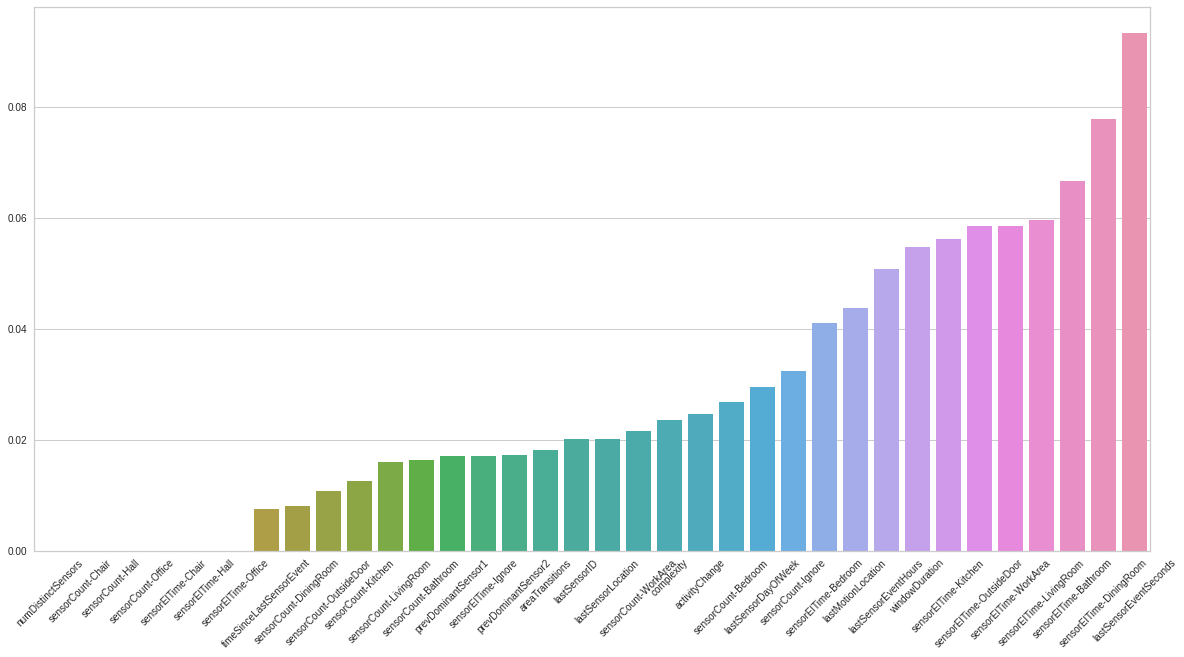

In [51]:
xs = list(sorted_d.keys())
ys = list(sorted_d.values())
plt.figure(figsize=(20,10))
sns.barplot(xs, ys,)
plt.xticks(rotation=45);